In [31]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
#imp.reload(HelperPI)
import HelperPI
import itertools
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import inv_boxcox
from scipy.stats.distributions import uniform, lognorm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [4]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [6]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [9]:
impdata = pd.read_excel(r'B:\Phillip\Mapping\CBSA_Analysis\Modeling\ModelDataV2.xlsx')

In [13]:
mean = np.mean(impdata['TARGET_SALESPOS'])
std = np.std(impdata['TARGET_SALESPOS'])
mean, std

base = impdata[impdata['TARGET_SALESPOS'] < mean+std*10]

#base['SALES_TARGET_N12_CBRT'], lmda = stats.boxcox(base['SALES_TARGET_N12'])
base.describe()

,STORE_ID,TARGET_SALES_ALL,TARGET_SALESPOS,TARGET_SALESWOTMR,AGFORFISHHUNT_NAICS,ARCHERY_PARTICIP,ATTEND_RELIG_SERV,ATTENDED_COUNTRY_SHOW,AVG_HH_SIZE,BOATING_PARTICIP,CAMP_EQUIP,CAMP_FEES,CASH_CONTRIB_POL,CASH_CONTRIB_RELIG,CC_DEBT,DIVIND,FISHING_FRESH_PARTICIP,FISHING_SALT_PARTICIP,GLBL_WARM_NO_THREAT,GOV_NOFOCUS_ENVIR,HF_EQUIP,HH_FOODSTAMPS,HH_OWNS_ATV,HH_W_TRUCK,HS_DIPLOMA,HUNTED_RIFLE,HUNTED_SHOTGUN,KAYAKING_PARTICIP,MARRIED_POP,MEDAGE,MEDDISINC_2018,NASCAR_SUPERFAN,POPGRWTH,RTS_NAICS,SHOOTING_PARTICIP,TOT_HH_2018,TOTPOP_2018,WATCH_FISHING,WATCH_FOXNEWS,WATCH_NASCAR,WATCH_OUTDOOR_CHNNL,WATCH_WWE,WS_EQUIP,STORE_SQFT
count,151.000000,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000,1.510000e+02,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000
mean,242.503311,2.994367e+07,2.493755e+07,2.513014e+07,1.372193e+05,24505.781457,192267.125828,63159.417219,2.559669,48929.642384,7.247407e+06,1.611049e+07,8.690371e+06,4.688459e+08,2.889998e+08,54.121192,103730.403974,37207.086093,111625.615894,65522.291391,2.623471e+07,56398.258278,21714.821192,107516.980132,175643.430464,34631.933775,28676.596026,63703.688742,4.923647e+05,37.746358,48146.264901,26184.576159,0.985960,2.116474e+07,41887.649007,4.731166e+05,1.257577e+06,42171.264901,239057.728477,93025.370861,26194.668874,47344.549669,3.299102e+06,94629.980132
std,201.866519,1.037701e+07,8.572179e+06,8.780311e+06,1.795274e+05,18183.215988,156309.501821,48486.165381,0.197117,36361.653705,6.328228e+06,1.463651e+07,7.798234e+06,3.968170e+08,2.487358e+08,16.698709,72410.619355,30235.180862,85834.243782,50887.381172,2.218886e+07,46818.270187,13937.738850,75955.137577,134509.207585,23107.994224,19918.347968,48759.610909,3.960301e+05,3.379483,7471.826126,21621.515094,0.650967,1.697708e+07,31321.413411,3.713950e+05,1.017781e+06,30121.474739,183112.624148,64165.246711,17030.857837,37310.841235,2.912990e+06,56000.543713
min,1.000000,1.045880e+07,1.009142e+07,1.041062e+07,2.293000e+03,359.000000,2321.000000,945.000000,2.280000,745.000000,6.772800e+04,1.101880e+05,7.122600e+04,5.863210e+06,3.128080e+06,15.900000,1975.000000,349.000000,1641.000000,816.000000,3.574230e+05,342.000000,839.000000,2562.000000,2449.000000,776.000000,603.000000,708.000000,6.413000e+03,29.200000,32924.000000,276.000000,-0.420000,1.778040e+05,546.000000,6.276000e+03,1.449800e+04,717.000000,2785.000000,1494.000000,565.000000,557.000000,2.842400e+04,24523.000000
25%,40.500000,2.311427e+07,1.905329e+07,1.901695e+07,5.219900e+04,9621.500000,66591.000000,22879.500000,2.435000,18991.000000,2.107280e+06,4.337305e+06,2.406274e+06,1.420763e+08,8.504809e+07,44.550000,43033.000000,13022.000000,41050.000000,23077.000000,7.978771e+06,24071.500000,10423.500000,45893.500000,72417.500000,16705.500000,12803.000000,23935.000000,1.802730e+05,35.700000,42940.000000,9402.000000,0.480000,7.418297e+06,15346.000000,1.638050e+05,4.314260e+05,17679.000000,87730.000000,39370.500000,12821.500000,18471.500000,9.598655e+05,53625.500000
50%,401.000000,2.920366e+07,2.368966e+07,2.393775e+07,8.897700e+04,20086.000000,151254.000000,49942.000000,2.520000,40038.000000,5.221024e+06,1.129440e+07,5.992725e+06,3.522858e+08,2.142901e+08,56.000000,88104.000000,28472.000000,92132.000000,55200.000000,1.976345e+07,43331.000000,19214.000000,89884.000000,142992.000000,29662.000000,24576.000000,50818.000000,3.929030e+05,37.400000,46983.000000,19635.000000,0.990000,1.678096e+07,34871.000000,3.899370e+05,1.013047e+06,36250.000000,200856.000000,80567.000000,22460.000000,37242.000000,2.374535e+06,81805.000000
75%,441.500000,3.650229e+07,3.074709e+07,3.065411e+07,1.394405e+05,36256.000000,279

In [15]:
base['TARGET_SALESPOS'].describe()

count    1.510000e+02
mean     2.493755e+07
std      8.572179e+06
min      1.009142e+07
25%      1.905329e+07
50%      2.368966e+07
75%      3.074709e+07
max      5.856350e+07
Name: TARGET_SALESPOS, dtype: float64

In [16]:
collist = ['TARGET_SALESPOS','AGFORFISHHUNT_NAICS','ARCHERY_PARTICIP','ATTEND_RELIG_SERV','ATTENDED_COUNTRY_SHOW',
          'AVG_HH_SIZE','BOATING_PARTICIP','CAMP_EQUIP','CAMP_FEES','CASH_CONTRIB_POL','CASH_CONTRIB_RELIG',
          'CC_DEBT','DIVIND','FISHING_FRESH_PARTICIP','FISHING_SALT_PARTICIP','GLBL_WARM_NO_THREAT','GOV_NOFOCUS_ENVIR',
          'HF_EQUIP','HH_FOODSTAMPS','HH_OWNS_ATV','HH_W_TRUCK','HS_DIPLOMA','HUNTED_RIFLE','HUNTED_SHOTGUN',
          'KAYAKING_PARTICIP','MARRIED_POP','MEDAGE','MEDDISINC_2018','NASCAR_SUPERFAN','POPGRWTH','RTS_NAICS',
          'SHOOTING_PARTICIP','TOT_HH_2018','TOTPOP_2018','WATCH_FISHING','WATCH_NASCAR','WATCH_OUTDOOR_CHNNL',
          'WATCH_WWE','WS_EQUIP','STORE_SQFT']

collist_X = ['AGFORFISHHUNT_NAICS','ARCHERY_PARTICIP','ATTEND_RELIG_SERV','ATTENDED_COUNTRY_SHOW',
          'AVG_HH_SIZE','BOATING_PARTICIP','CAMP_EQUIP','CAMP_FEES','CASH_CONTRIB_POL','CASH_CONTRIB_RELIG',
          'CC_DEBT','DIVIND','FISHING_FRESH_PARTICIP','FISHING_SALT_PARTICIP','GLBL_WARM_NO_THREAT','GOV_NOFOCUS_ENVIR',
          'HF_EQUIP','HH_FOODSTAMPS','HH_OWNS_ATV','HH_W_TRUCK','HS_DIPLOMA','HUNTED_RIFLE','HUNTED_SHOTGUN',
          'KAYAKING_PARTICIP','MARRIED_POP','MEDAGE','MEDDISINC_2018','NASCAR_SUPERFAN','POPGRWTH','RTS_NAICS',
          'SHOOTING_PARTICIP','TOT_HH_2018','TOTPOP_2018','WATCH_FISHING','WATCH_NASCAR','WATCH_OUTDOOR_CHNNL',
          'WATCH_WWE','WS_EQUIP','STORE_SQFT']

#collist_y = ['SALES_TARGET_N12_CBRT']

collist_y = ['TARGET_SALESPOS']

In [26]:
train, test = helper.splitData(base[collist], .8)

train, val = helper.splitData(train, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].to_numpy().ravel()
val_X = val[collist_X]
val_y = val[collist_y].to_numpy().ravel()
test_X = test[collist_X]
test_y = test[collist_y].to_numpy().ravel()

interactions = helper.find_iteractions(train_X, train_y)
interactions.to_csv('interactions.csv')

(60, 40) (60, 40) (31, 40)


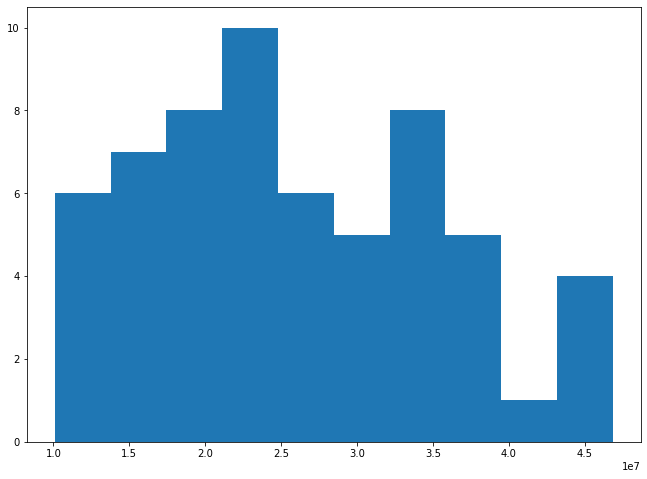

In [27]:
plt.hist(train_y, bins = 10)
plt.show()

In [43]:
collist_X = ['AGFORFISHHUNT_NAICS','ARCHERY_PARTICIP','ATTEND_RELIG_SERV','ATTENDED_COUNTRY_SHOW',
          'AVG_HH_SIZE','BOATING_PARTICIP','CAMP_EQUIP','CAMP_FEES','CASH_CONTRIB_POL','CASH_CONTRIB_RELIG',
          'CC_DEBT','DIVIND','FISHING_FRESH_PARTICIP','FISHING_SALT_PARTICIP','GLBL_WARM_NO_THREAT','GOV_NOFOCUS_ENVIR',
          'HF_EQUIP','HH_FOODSTAMPS','HH_OWNS_ATV','HH_W_TRUCK','HS_DIPLOMA','HUNTED_RIFLE','HUNTED_SHOTGUN',
          'KAYAKING_PARTICIP','MARRIED_POP','MEDAGE','MEDDISINC_2018','NASCAR_SUPERFAN','POPGRWTH','RTS_NAICS',
          'SHOOTING_PARTICIP','TOT_HH_2018','TOTPOP_2018','WATCH_FISHING','WATCH_NASCAR','WATCH_OUTDOOR_CHNNL',
          'WATCH_WWE','WS_EQUIP','STORE_SQFT','AVG_HH_SIZE*FISHING_FRESH_PARTICIP','AVG_HH_SIZE*HH_W_TRUCK',
          'WATCH_OUTDOOR_CHNNL*POPGRWTH']

train_X['AVG_HH_SIZE*FISHING_FRESH_PARTICIP'] = train_X['AVG_HH_SIZE']*train_X['FISHING_FRESH_PARTICIP']
val_X['AVG_HH_SIZE*FISHING_FRESH_PARTICIP'] = val_X['AVG_HH_SIZE']*val_X['FISHING_FRESH_PARTICIP']
test_X['AVG_HH_SIZE*FISHING_FRESH_PARTICIP'] = test_X['AVG_HH_SIZE']*test_X['FISHING_FRESH_PARTICIP']

train_X['AVG_HH_SIZE*HH_W_TRUCK'] = train_X['AVG_HH_SIZE']*train_X['HH_W_TRUCK']
val_X['AVG_HH_SIZE*HH_W_TRUCK'] = val_X['AVG_HH_SIZE']*val_X['HH_W_TRUCK']
test_X['AVG_HH_SIZE*HH_W_TRUCK'] = test_X['AVG_HH_SIZE']*test_X['HH_W_TRUCK']

train_X['WATCH_OUTDOOR_CHNNL*POPGRWTH'] = train_X['WATCH_OUTDOOR_CHNNL']*train_X['POPGRWTH']
val_X['WATCH_OUTDOOR_CHNNL*POPGRWTH'] = val_X['WATCH_OUTDOOR_CHNNL']*val_X['POPGRWTH']
test_X['WATCH_OUTDOOR_CHNNL*POPGRWTH'] = test_X['WATCH_OUTDOOR_CHNNL']*test_X['POPGRWTH']

#imr = SimpleImputer(strategy='median')
#imr = imr.fit(train_X)

#train_X = pd.DataFrame(imr.transform(train_X.values), columns = collist_X)
#val_X = pd.DataFrame(imr.transform(val_X.values), columns = collist_X)
#test_X = pd.DataFrame(imr.transform(test_X.values), columns = collist_X)

#stdsc = StandardScaler()
#stdsc.fit(train_X)

#train_X = pd.DataFrame(stdsc.transform(train_X), columns = collist_X)
#val_X = pd.DataFrame(stdsc.transform(val_X), columns = collist_X)
#test_X = pd.DataFrame(stdsc.transform(test_X), columns = collist_X)


for var in collist_X:
    name = var + '_cbrt'
    train_X[name] = np.cbrt(train_X[var])
    val_X[name] = np.cbrt(val_X[var])
    test_X[name] = np.cbrt(test_X[var])
    name = var + '_sq'
    train_X[name] = np.power(train_X[var], 2)
    val_X[name] = np.power(val_X[var], 2)
    test_X[name] = np.power(test_X[var], 2)
   
    
collist_X_expanded = train_X.columns.values

In [44]:
collist_X_expanded = collist_X_expanded.tolist()

In [45]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]


,column_name,missing_count,missing_ratio


Anderson-Darling: 0.7221725283415026 Critical Value: 0.743 
train_y is normally distributed


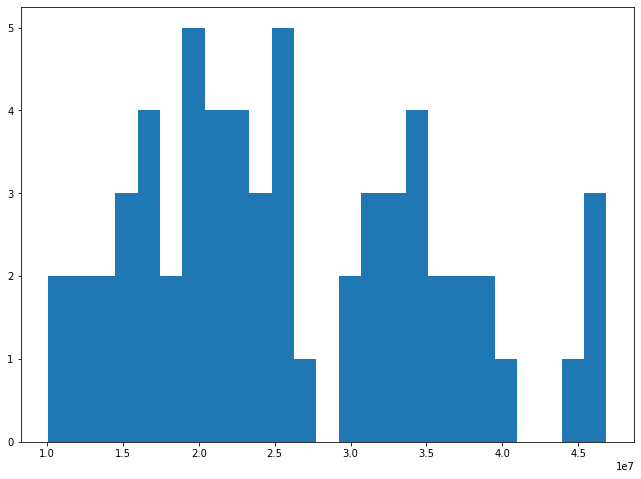

In [47]:
stat, cv, sig = stats.anderson(train_y, 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))
if stat > cv[2]:
    print('train_y is not normally distributed')
else:
    print('train_y is normally distributed')
plt.hist(train_y, bins=25)
plt.show()

In [51]:
matplotlib.rcParams['figure.figsize'] = (5,2)

#collist_X_expanded.remove('VISITS_LT_sqrt')
#collist_X_expanded.remove('YOY_TREND_log')


train_X = train_X[collist_X_expanded]

collist_X_expanded = sorted(collist_X_expanded, key=str.lower)



for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.to_numpy(), train_y)
    print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                               AGFORFISHHUNT_NAICS Corr Coef:    0.36 - pval:  0.0047
                          AGFORFISHHUNT_NAICS_cbrt Corr Coef:     0.3 - pval:  0.0194
                            AGFORFISHHUNT_NAICS_sq Corr Coef:    0.25 - pval:  0.0499
                                  ARCHERY_PARTICIP Corr Coef:     0.5 - pval:  0.0000
                             ARCHERY_PARTICIP_cbrt Corr Coef:    0.47 - pval:  0.0001
                               ARCHERY_PARTICIP_sq Corr Coef:    0.12 - pval:  0.3515
                                 ATTEND_RELIG_SERV Corr Coef:    0.48 - pval:  0.0001
                            ATTEND_RELIG_SERV_cbrt Corr Coef:    0.47 - pval:  0.0002
                              ATTEND_RELIG_SERV_sq Corr Coef:    0.14 - pval:  0.2803
                             ATTENDED_COUNTRY_SHOW Corr Coef:    0.51 - pval:  0.0000
                        ATTENDED_COUNTRY_SHOW_cbrt Corr Coef:    0.49 - pval:  0.0001
                          ATTENDED_COUNTRY_SHOW_sq Cor

In [53]:
collist_X_expanded = ['AGFORFISHHUNT_NAICS','ARCHERY_PARTICIP','ATTEND_RELIG_SERV','ATTENDED_COUNTRY_SHOW',
                     'BOATING_PARTICIP','CAMP_EQUIP_cbrt','CAMP_FEES_cbrt','CASH_CONTRIB_POL_cbrt',
                     'CASH_CONTRIB_RELIG_cbrt','CC_DEBT_cbrt','DIVIND','FISHING_FRESH_PARTICIP',
                     'FISHING_SALT_PARTICIP','GLBL_WARM_NO_THREAT','GOV_NOFOCUS_ENVIR','HF_EQUIP_cbrt',
                     'HH_FOODSTAMPS_cbrt','HH_OWNS_ATV','HH_W_TRUCK','HS_DIPLOMA','HUNTED_RIFLE','HUNTED_SHOTGUN',
                     'KAYAKING_PARTICIP','MARRIED_POP','MEDDISINC_2018_cbrt','NASCAR_SUPERFAN_cbrt',
                     'POPGRWTH','RTS_NAICS','SHOOTING_PARTICIP','STORE_SQFT','TOT_HH_2018','TOTPOP_2018',
                     'WATCH_FISHING','WATCH_NASCAR','WATCH_OUTDOOR_CHNNL','WATCH_WWE','WS_EQUIP_cbrt']
train_X = train_X[collist_X_expanded]

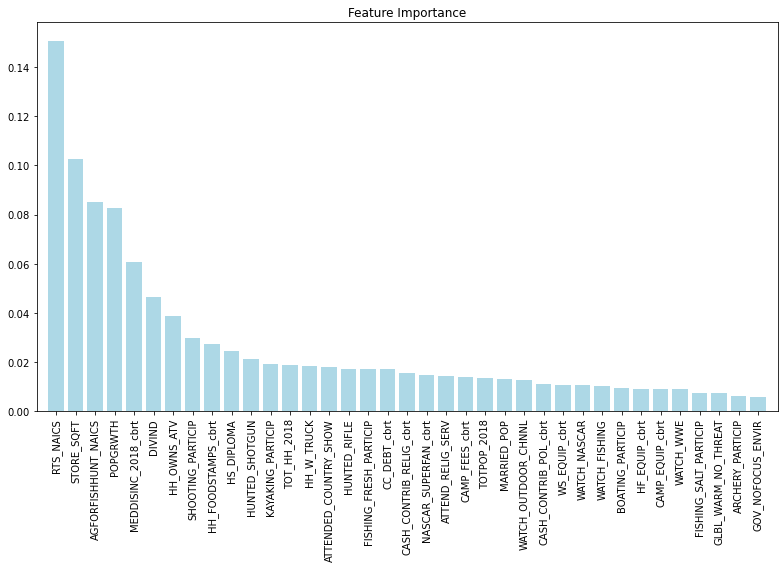

In [55]:
feat_labels = np.asarray(collist_X_expanded)

forests = RandomForestRegressor(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(train_X2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
#                                       importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [57]:
slct = SelectKBest(f_regression, k=15)
slct.fit(train_X, train_y)
selected = slct.get_support()
feat_labels2 = feat_labels[selected]
feat_labels2

array(['ARCHERY_PARTICIP', 'ATTENDED_COUNTRY_SHOW', 'BOATING_PARTICIP',
       'FISHING_FRESH_PARTICIP', 'GLBL_WARM_NO_THREAT', 'HH_OWNS_ATV',
       'HH_W_TRUCK', 'HUNTED_RIFLE', 'HUNTED_SHOTGUN',
       'KAYAKING_PARTICIP', 'RTS_NAICS', 'SHOOTING_PARTICIP',
       'WATCH_FISHING', 'WATCH_NASCAR', 'WATCH_OUTDOOR_CHNNL'],
      dtype='<U23')

     VIF Factor                 feature
6   2303.786034              HH_W_TRUCK
1   2269.914130   ATTENDED_COUNTRY_SHOW
2   2226.554234        BOATING_PARTICIP
14  2154.830569     WATCH_OUTDOOR_CHNNL
7   2027.323522            HUNTED_RIFLE
11  1776.987626       SHOOTING_PARTICIP
13  1768.500406            WATCH_NASCAR
9   1595.177580       KAYAKING_PARTICIP
0   1535.937467        ARCHERY_PARTICIP
8   1298.949593          HUNTED_SHOTGUN
12  1154.161269           WATCH_FISHING
4    886.710794     GLBL_WARM_NO_THREAT
3    709.757422  FISHING_FRESH_PARTICIP
5    597.918572             HH_OWNS_ATV
10    84.535620               RTS_NAICS


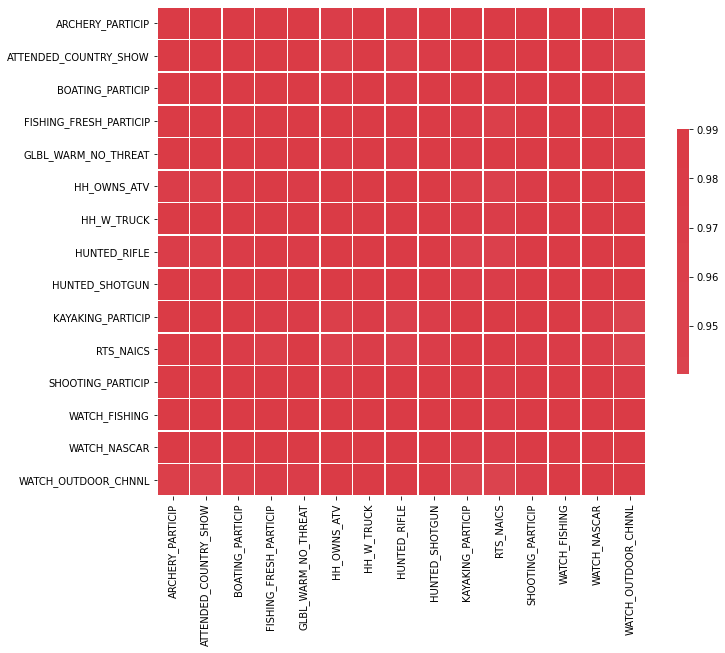

In [58]:
collist_X2 = ['ARCHERY_PARTICIP', 'ATTENDED_COUNTRY_SHOW', 'BOATING_PARTICIP',
       'FISHING_FRESH_PARTICIP', 'GLBL_WARM_NO_THREAT', 'HH_OWNS_ATV',
       'HH_W_TRUCK', 'HUNTED_RIFLE', 'HUNTED_SHOTGUN',
       'KAYAKING_PARTICIP', 'RTS_NAICS', 'SHOOTING_PARTICIP',
       'WATCH_FISHING', 'WATCH_NASCAR', 'WATCH_OUTDOOR_CHNNL']

#collist_X2 = feat_labels2.tolist()

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


print(helper.calc_VIFs(train_X2))

In [60]:
import statsmodels.api as sm

mod = sm.OLS(train_y, train_X2)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):             -0.259
Method:                 Least Squares   F-statistic:                             0.1766
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                        1.00
Time:                        16:03:10   Log-Likelihood:                         -1111.5
No. Observations:                  60   AIC:                                      2253.
Df Residuals:                      45   BIC:                                      2284.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [65]:
param_test1 = {
     'learning_rate':uniform(0.01,0.09),
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:squarederror'],
     'gamma':lognorm(0.1, 1.0),
     'n_estimators':range(10,200,2)
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=500,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1) 

Parameter search took 11.13 seconds for 500 candidate parameter settings.
Best Mean validation score: -65219612149147.352 (std: 61601611554065.852)
Parameters: {'colsample_bytree': 0.8798607492982256, 'gamma': 2.2710877160358294, 'learning_rate': 0.058187760587104974, 'max_depth': 7, 'min_child_weight': 8, 'n_estimators': 64, 'objective': 'reg:squarederror', 'reg_alpha': 0.9299118173247116, 'reg_lambda': 0.7814066861925454, 'subsample': 0.6290265898086376}


In [66]:
tuned_model = xgb.XGBRegressor( 
                        learning_rate = 0.0582,
                        n_estimators = 64,
                        max_depth = 7,
                        min_child_weight = 8,
                        subsample = 0.6290,
                        colsample_bytree = 0.8799,
                        objective = 'reg:squarederror',
                        reg_alpha= 0.9299,
                        reg_lambda = 0.7814,
                        gamma = 2.2711,
                        seed = 27)
xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

[0]	validation_0-rmse:2.62551e+07	validation_1-rmse:2.31543e+07	validation_2-rmse:2.59762e+07
Multiple eval metrics have been passed: 'validation_2-rmse' will be used for early stopping.

Will train until validation_2-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.48499e+07	validation_1-rmse:2.17829e+07	validation_2-rmse:2.4504e+07
[2]	validation_0-rmse:2.35649e+07	validation_1-rmse:2.05041e+07	validation_2-rmse:2.31892e+07
[3]	validation_0-rmse:2.24082e+07	validation_1-rmse:1.94393e+07	validation_2-rmse:2.19600e+07
[4]	validation_0-rmse:2.12013e+07	validation_1-rmse:1.8289e+07	validation_2-rmse:2.0706e+07
[5]	validation_0-rmse:2.02329e+07	validation_1-rmse:1.73521e+07	validation_2-rmse:1.97068e+07
[6]	validation_0-rmse:1.92512e+07	validation_1-rmse:1.64309e+07	validation_2-rmse:1.8744e+07
[7]	validation_0-rmse:1.83371e+07	validation_1-rmse:1.56183e+07	validation_2-rmse:1.78171e+07
[8]	validation_0-rmse:1.74861e+07	validation_1-rmse:1.48003e+07	validation_2-rmse:1.695e+07


In [67]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.4683995522832448
RMSE Train: 6910914.720464252
RMSE Val: 7202778.187018675
RMSE Test: 8329081.781212161
MAE Train: 5406232.841849999
MAE Val: 5334422.218366668
MAE Test: 5456403.545935484


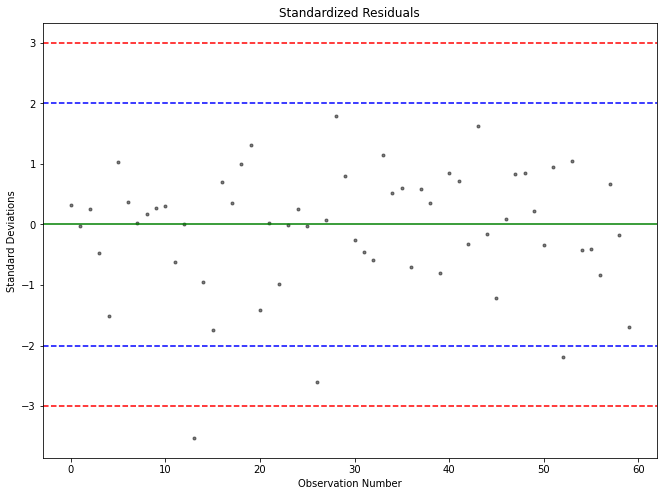

In [68]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()